In [138]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from scipy.stats import ttest_ind

In [139]:
# import data
final_demo_df = pd.read_csv("df_final_demo.txt")
age_group_counts = final_demo_df['clnt_age'].value_counts().sort_index()
final_experiment_clients_df = pd.read_csv("df_final_experiment_clients.txt")
final_web_data_pt_1_df = pd.read_csv("df_final_web_data_pt_1.txt")
final_web_data_pt_2_df = pd.read_csv("df_final_web_data_pt_2.txt")

In [140]:
# merge data
df_digital_footprints = pd.concat([final_web_data_pt_1_df,final_web_data_pt_2_df ], axis=0)
df_merged_1= pd.merge(final_demo_df, df_digital_footprints, how="outer", on=["client_id"])
final_df= pd.merge(df_merged_1, final_experiment_clients_df, how="outer", on=["client_id"])

In [141]:
# dropping rows that have nans in test vs control
final_df["Variation"] = final_df["Variation"].replace(['nan', 'NAN', 'NaN', 'Nan', ''], np.nan)
print(final_df.shape)
cleaned_df=final_df.dropna(subset=['Variation'])
print(cleaned_df.shape)

(755405, 14)
(321309, 14)


In [142]:
# dropping rows with nan in any row
print(cleaned_df.shape)
cleaned_df = cleaned_df.dropna()
print(cleaned_df.shape)

(321309, 14)
(321195, 14)


In [143]:
# additional checks
print(cleaned_df.nunique())
print(cleaned_df.dtypes)

client_id            50487
clnt_tenure_yr          53
clnt_tenure_mnth       469
clnt_age               158
gendr                    4
num_accts                7
bal                  50311
calls_6_mnth             7
logons_6_mnth            7
visitor_id           55994
visit_id             69183
process_step             5
date_time           283253
Variation                2
dtype: int64
client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
visitor_id           object
visit_id             object
process_step         object
date_time            object
Variation            object
dtype: object


In [144]:
# additional check for unique values in categorical columns
for col in cleaned_df.columns:
    if cleaned_df[col].dtype=='object':
       print (cleaned_df[col].unique())

['U' 'M' 'F' 'X']
['427070339_1413275162' '336210275_56978226960' '245908175_84333642537'
 ... '69579557_2827236069' '8756552_54841419737' '317123960_46820919455']
['228976764_46825473280_96584' '104438405_2368283624_817211'
 '724930510_65323235593_692754' ... '268191173_38958330991_849725'
 '101846948_96925910026_299041' '769876461_30381166055_830233']
['confirm' 'step_3' 'step_2' 'step_1' 'start']
['2017-04-02 11:51:13' '2017-04-02 11:47:50' '2017-04-02 11:46:45' ...
 '2017-03-30 23:58:51' '2017-03-30 23:58:40' '2017-03-30 23:55:11']
['Test' 'Control']


In [145]:
# gender check
gender_counts = cleaned_df.groupby('gendr')['client_id'].nunique()
gender_counts

gendr
F    16258
M    16947
U    17280
X        2
Name: client_id, dtype: int64

In [146]:
# Group all the clients by Variation (Control/Test)
client_count_by_test = cleaned_df.groupby('Variation')['client_id'].count()
client_count_by_test

Variation
Control    143408
Test       177787
Name: client_id, dtype: int64

In [147]:
# Age central measures for all clients
mean_age = cleaned_df['clnt_age'].mean().round(1)
median_age = cleaned_df['clnt_age'].median()
mode_age = cleaned_df['clnt_age'].mode()[0]
mean_age, median_age, mode_age

(48.6, 50.0, 58.5)

In [148]:
# mean age by group
mean_age = cleaned_df.groupby(['Variation'])['clnt_age'].mean().round(2).reset_index
mean_age

<bound method Series.reset_index of Variation
Control    48.31
Test       48.75
Name: clnt_age, dtype: float64>

In [149]:
# age range
min_age = cleaned_df['clnt_age'].min()
max_age = cleaned_df['clnt_age'].max()
min_age, max_age

(17.0, 96.0)

In [150]:
# Count of tenure years by age group
age_group = cleaned_df.groupby('clnt_age')
client_count_by_age_tenure = cleaned_df.groupby(['client_id', 'clnt_age'])['clnt_tenure_yr'].nunique()
client_count_by_age_tenure

client_id  clnt_age
555        29.5        1
647        57.5        1
934        51.0        1
1028       36.0        1
1104       48.0        1
                      ..
9999150    30.0        1
9999400    28.5        1
9999626    35.0        1
9999729    31.0        1
9999832    49.0        1
Name: clnt_tenure_yr, Length: 50487, dtype: int64

In [151]:
# Average length of tenure (years) by age group
avg_tenure_by_age = cleaned_df.groupby('clnt_age')['clnt_tenure_yr'].mean().round(1)
avg_tenure_by_age

clnt_age
17.0     8.7
17.5     7.5
18.0    10.1
18.5     9.0
19.0     8.9
        ... 
93.5    20.5
94.0     7.4
94.5    15.0
95.5    12.0
96.0    16.8
Name: clnt_tenure_yr, Length: 158, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


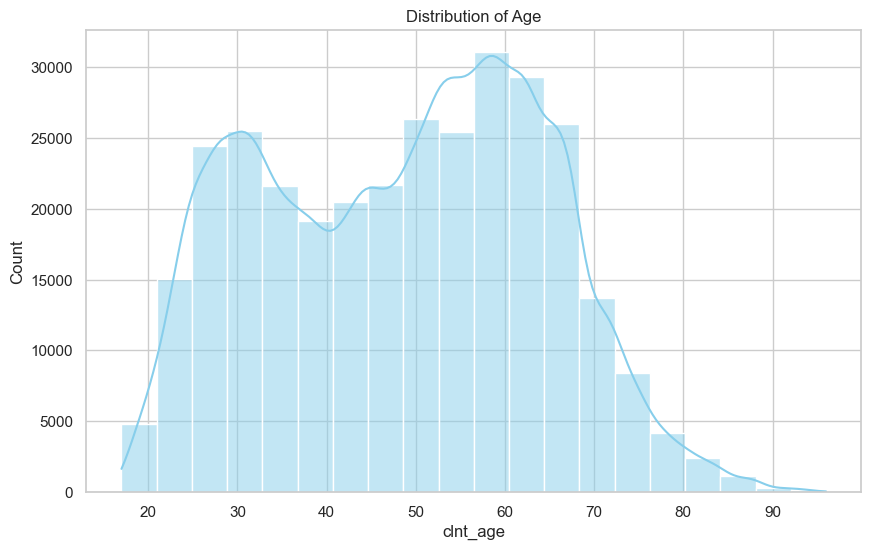

In [152]:
#  distribution of number of clients by age groups
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_df['clnt_age'], bins=20, kde=True, color="skyblue")
plt.title('Distribution of Age')
plt.show()

In [153]:
# Average account balance by Variation
avg_balance_account = cleaned_df.groupby(['Variation'])['bal'].mean().round(1).reset_index
avg_balance_account

<bound method Series.reset_index of Variation
Control    159408.4
Test       164477.4
Name: bal, dtype: float64>

In [154]:
# if still time, add function for outlier detection per column

# STATS

### demographics between groups

In [157]:
cleaned_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13,Test
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50,Test
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,Test
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08,Test
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,step_2,2017-03-30 23:59:15,Test
321305,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,step_1,2017-03-30 23:58:51,Test
321306,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:58:40,Test
321307,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:55:11,Test


In [158]:
# create df with 1 row for each client id
df = cleaned_df.copy()
df = df.drop(columns = ["visitor_id", "visit_id", "process_step", "date_time"])
df = df.drop_duplicates()
df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
11,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
17,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
22,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
23,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
321271,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
321283,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control
321288,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
321298,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


In [159]:
# client age 
#H0: mu Control = mu Test
#H1: mu Control != mu Test

# Choose the significance level
alpha = 0.05

# Defining Control and Test Groups for Client Age
control_1 = df[df["Variation"]=="Control"]["clnt_age"]

test_1 = df[df["Variation"]=="Test"]["clnt_age"]
#print(test_1)

st.ttest_ind(control_1, test_1, alternative = 'two-sided')
# the p_value is lower than our significance level, we can reject the null hypothesis 

TtestResult(statistic=2.416145610586789, pvalue=0.015689311849750098, df=50485.0)

In [160]:
#Defining Control and Test Groups for Client Tenure
 
control_2 = df[df["Variation"]=="Control"]["clnt_tenure_yr"]
test_2 = df[df["Variation"]=="Test"]["clnt_tenure_yr"]
#print(test_1)

st.ttest_ind(control_2, test_2, alternative = 'two-sided')
# the p_value is high than our significance level, we can not reject the null hypothesis 

TtestResult(statistic=1.7148872757395706, pvalue=0.0863720328483434, df=50485.0)

In [161]:
# Defining Control and Test Groups for Account Balances
control_3 = df[df["Variation"]=="Control"]["bal"]
test_3 = df[df["Variation"]=="Test"]["bal"]

st.ttest_ind(control_3,test_3,alternative = 'two-sided')
# the p_value is higher than our significance level, we can not reject the null hypothesis 

TtestResult(statistic=0.4413421205814338, pvalue=0.6589672273121787, df=50485.0)

In [162]:
completion_stage_sorted = cleaned_df.drop(['clnt_tenure_mnth','gendr','visit_id', 'visitor_id','Variation', 'clnt_tenure_yr',	'clnt_age',	'num_accts', 'bal',	'calls_6_mnth', 	'logons_6_mnth', 'date_time'], axis=1)
completion_stage_sorted = cleaned_df.groupby('process_step')['client_id'].nunique()
completion_stage_sorted = completion_stage_sorted.sort_values(ascending=False)
completion_stage_sorted 

process_step
start      50063
step_1     44406
step_2     40896
step_3     38292
confirm    34110
Name: client_id, dtype: int64

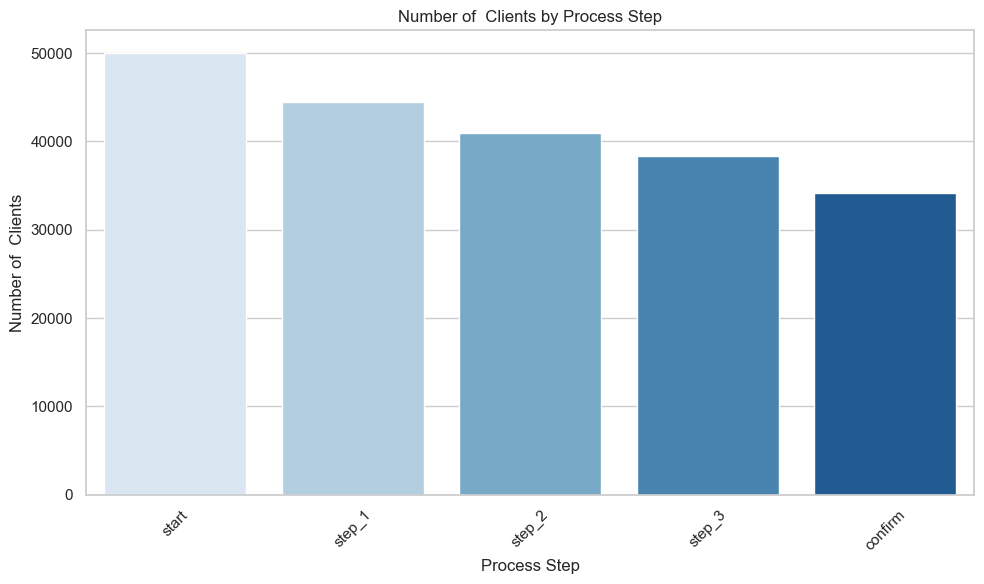

In [163]:
plt.figure(figsize=(10, 6))
sns.barplot(x=completion_stage_sorted.index, y=completion_stage_sorted.values, palette='Blues')
plt.title('Number of  Clients by Process Step')
plt.xlabel('Process Step')
plt.ylabel('Number of  Clients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [164]:
# Start Bounce Rate
# Number of visitors who left after the first step/Total visitors to the first step
start_bounce_rate = (completion_stage_sorted['start'] - completion_stage_sorted['step_1']) / completion_stage_sorted['start']*100
print ('Start bounce rate:', start_bounce_rate.round(1)
, '%')
 

Start bounce rate: 11.3 %


In [165]:
# First Step Bounce Rate
# Number of visitors who left after the first step/Total visitors to the first step
first_step_bounce_rate = (completion_stage_sorted['step_1'] - completion_stage_sorted['step_2']) / completion_stage_sorted['step_1']*100
first_step_bounce_rate.round(2)
print( 'First step bounce rate:', first_step_bounce_rate.round(1)
, '%')

First step bounce rate: 7.9 %


In [166]:
# Second Step Bounce Rate
# Number of visitors who left after the second step/Total visitors to the second step
second_step_bounce_rate = (completion_stage_sorted['step_2'] - completion_stage_sorted['step_3']) / completion_stage_sorted['step_2']*100
second_step_bounce_rate.round(2)
print( 'Second step bounce rate:', second_step_bounce_rate.round(1)
, '%')

Second step bounce rate: 6.4 %


In [167]:
# Third Step Bounce Rate
# Number of visitors who left after the third step/Total visitors to the third step
third_step_bounce_rate = (completion_stage_sorted['step_3'] - completion_stage_sorted['confirm']) / completion_stage_sorted['step_3']*100
third_step_bounce_rate.round(1)
print( 'Third step bounce rate:', third_step_bounce_rate.round(1), '%')

Third step bounce rate: 10.9 %


In [168]:
# Total completion rate
started = cleaned_df[cleaned_df['process_step'] == 'start']['client_id'].nunique()
confirmed = cleaned_df[cleaned_df['process_step'] == 'confirm']['client_id'].nunique()

# Calculate the completion rate
completion_rate = (confirmed / started) * 100

# Display the completion rate
print(f"Completion Rate: {completion_rate:.2f}%")

Completion Rate: 68.13%


In [169]:
# Completion rate by variation
# Test
test_started=cleaned_df[(cleaned_df['process_step']=='start')&(cleaned_df['Variation']=='Test')]['client_id'].nunique()
test_confirmed=cleaned_df[(cleaned_df['process_step']=='confirm')&(cleaned_df['Variation']=='Test')]['client_id'].nunique()
# The completion rate for Test variation
test_completion_rate = (test_confirmed / test_started) * 100 if test_started > 0 else 0
print(f"Completion Rate for Test: {test_completion_rate:.2f}%")
# Control variation
control_started = cleaned_df[(cleaned_df['process_step'] == 'start') & (cleaned_df['Variation'] == 'Control')]['client_id'].nunique()
control_confirmed = cleaned_df[(cleaned_df['process_step'] == 'confirm') & (cleaned_df['Variation'] == 'Control')]['client_id'].nunique()
# The completion rate for Control variation
control_completion_rate = (control_confirmed / control_started) * 100 if control_started > 0 else 0
print(f"Completion Rate for Control: {control_completion_rate:.2f}%")

Completion Rate for Test: 70.04%
Completion Rate for Control: 65.96%


In [170]:
# Create a DataFrame for completion rates
completion_rate_df = pd.DataFrame({
    'Variation': ['Test', 'Control'],
    'Started': [test_started, control_started],
    'Confirmed': [test_confirmed, control_confirmed],
    'Completion Rate': [test_completion_rate, control_completion_rate]
})

# Save as CSV
completion_rate_df.to_csv('completion_rates.csv', index=False)

In [171]:
# Define the process steps in the correct order
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Check for errors in the process steps by comparing with the previous step
cleaned_df['error_flag'] = cleaned_df['process_step'].apply(lambda step: step_order.index(step))

# Check if any process step goes backward
cleaned_df['error'] = (cleaned_df['error_flag'].diff() < 0).astype(int)

# Filter for Test and Control groups
test_group = cleaned_df[cleaned_df['Variation'] == 'Test']
control_group = cleaned_df[cleaned_df['Variation'] == 'Control']

# Calculate error rates for Test and Control groups
test_error_rate = test_group['error'].mean() * 100 if not test_group.empty else 0
control_error_rate = control_group['error'].mean() * 100 if not control_group.empty else 0

# Print error rates
print(f"Error Rate for Test Variation: {test_error_rate:.2f}%")
print(f"Error Rate for Control Variation: {control_error_rate:.2f}%")

# Perform t-test between the Test and Control groups
t_stat, p_value = st.ttest_ind(
    test_group['error'], control_group['error'], equal_var=False
)

# Print t-test results
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

Error Rate for Test Variation: 59.17%
Error Rate for Control Variation: 59.72%
T-statistic: -3.1436, P-value: 0.0017


In [172]:
# total frequency of each step total by control/test 
process_step_frequency_total = cleaned_df.groupby(['Variation'])['process_step'].value_counts()
process_step_frequency_total 
process_step_variation = cleaned_df.groupby(['Variation','process_step'])['client_id'].nunique() 
process_step_sorted_variation = pd.DataFrame(process_step_variation).sort_values(by=['Variation','client_id'], ascending = False)
process_step_sorted_variation

client_id
Variation process_step           
Test      start             26672
          step_1            24260
          step_2            22252
          step_3            20876
          confirm           18682
Control   start             23391
          step_1            20146
          step_2            18644
          step_3            17416
          confirm           15428

In [173]:
process_step_frequency_total.sum()

321195

In [174]:
# Unique frequency for each step for all clients
process_step_frequency_unique = cleaned_df.groupby('process_step')['client_id'].nunique()
process_step_frequency_unique.sort_values(ascending=False)

process_step
start      50063
step_1     44406
step_2     40896
step_3     38292
confirm    34110
Name: client_id, dtype: int64

In [175]:
# unique frequency by client by control/test as % of total frequency
horizontal_concat = pd.concat([process_step_frequency_total ,process_step_sorted_variation ], axis=1)
horizontal_concat['unique_frequency as % total'] = horizontal_concat['client_id']/horizontal_concat['count']
horizontal_concat.fillna(0).round(2)

count  client_id  unique_frequency as % total
Variation process_step                                               
Control   start         47589      23391                         0.49
          step_1        29657      20146                         0.68
          step_2        25877      18644                         0.72
          step_3        22787      17416                         0.76
          confirm       17498      15428                         0.88
Test      start         56452      26672                         0.47
          step_1        38753      24260                         0.63
          step_2        30978      22252                         0.72
          step_3        25888      20876                         0.81
          confirm       25716      18682                         0.73

In [176]:
horizontal_concat['unique_frequency as % total'] = horizontal_concat['client_id']/horizontal_concat['count']

In [177]:
process_step_sorted_variation['Drop_out'] = process_step_sorted_variation.groupby('Variation')['client_id'].diff()*-1


In [178]:
process_step_sorted_variation['Percentage_drop_out, %'] = process_step_sorted_variation['Drop_out']  / process_step_sorted_variation['client_id'].shift(1).round(2)* 100
process_step_sorted_variation.fillna(0).round(2)


client_id  Drop_out  Percentage_drop_out, %
Variation process_step                                             
Test      start             26672       0.0                    0.00
          step_1            24260    2412.0                    9.04
          step_2            22252    2008.0                    8.28
          step_3            20876    1376.0                    6.18
          confirm           18682    2194.0                   10.51
Control   start             23391       0.0                    0.00
          step_1            20146    3245.0                   13.87
          step_2            18644    1502.0                    7.46
          step_3            17416    1228.0                    6.59
          confirm           15428    1988.0                   11.41

In [179]:
# Group by Variation (Test and Control)
grouped_variations = cleaned_df.groupby('Variation')

# Initialize a dictionary to store dropout rates for each group
dropout_rates = {}

# Iterate over each group (Test and Control)
for variation, group_data in grouped_variations:
    
    # Step 1: Get clients who reached the 'confirm' step (dropouts)
    dropout_clients = group_data[group_data['process_step'] == 'confirm']['client_id'].unique()
    
    # Step 2: Get total unique clients in the group
    total_participants = group_data['client_id'].nunique()
    
    # Step 3: Calculate the number of dropouts
    num_dropouts = len(dropout_clients)
    
    # Step 4: Calculate dropout rate for the group
    dropout_rate = (num_dropouts / total_participants) * 100 if total_participants > 0 else 0
    
    # Store the result in the dictionary with the Variation as the key
    dropout_rates[variation] = dropout_rate

# Print dropout rates for Test and Control
print(f'Retention by Variation:')
for variation, rate in dropout_rates.items():
    print(f'{variation}: {rate:.2f}%')


Retention by Variation:
Control: 65.58%
Test: 69.29%


Duration KPIs

In [181]:
df = cleaned_df.copy()

# convert date time to right format
df['date_time'] = pd.to_datetime(df['date_time'])

# sort
df = df.sort_values(['client_id', 'visit_id', 'date_time'])

# define steps
steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# process each group (later grouped by client id and visit id)
def process_group(group):
    # sort group by date_time
    group = group.sort_values('date_time')
    durations = {}
    for i in range(len(steps) - 1):
        current_step = steps[i]
        next_step = steps[i + 1]
        current_times = group.loc[group['process_step'] == current_step, 'date_time']
        next_times = group.loc[group['process_step'] == next_step, 'date_time']
        if not current_times.empty and not next_times.empty:
            # get first occurrence of current step and last occurrence of next step
            current_time = current_times.iloc[0]
            next_time = next_times.iloc[-1]
            if current_time <= next_time:
                duration = (next_time - current_time).total_seconds()
                durations[f'{current_step}_to_{next_step}'] = duration
            else:
                # invalid if first instance of current step occurs after next step
                durations[f'{current_step}_to_{next_step}'] = np.nan
        else:
            durations[f'{current_step}_to_{next_step}'] = np.nan
    # total duration only if all steps are present
    all_steps_present = all(
        [not group.loc[group['process_step'] == step, 'date_time'].empty for step in steps])
    if all_steps_present:
        start_time = group.loc[group['process_step'] == 'start', 'date_time'].iloc[0]
        confirm_time = group.loc[group['process_step'] == 'confirm', 'date_time'].iloc[-1]
        if start_time <= confirm_time:
            total_duration = (confirm_time - start_time).total_seconds()
            durations['start_to_confirm'] = total_duration
        else:
            durations['start_to_confirm'] = np.nan
    else:
        durations['start_to_confirm'] = np.nan
    # identifiers
    durations['client_id'] = group['client_id'].iloc[0]
    durations['visit_id'] = group['visit_id'].iloc[0]
    return pd.Series(durations)

# apply function to grouped df
grouped = df.groupby(['client_id', 'visit_id'])
durations_df = grouped.apply(process_group).reset_index(drop=True)

# get test vs control per client_id and visit_id
variation_per_visit = df.groupby(['client_id', 'visit_id'])['Variation'].first().reset_index()
durations_df = durations_df.merge(variation_per_visit, on=['client_id', 'visit_id'], how='left')

# calculate average durations per client_id
average_durations = durations_df.groupby('client_id').mean(numeric_only=True).reset_index()

# merge 'Variation' per client_id
variation_per_client = df.groupby('client_id')['Variation'].first().reset_index()
average_durations = average_durations.merge(variation_per_client, on='client_id', how='left')

# define duration columns
duration_columns = [
    'start_to_step_1',
    'step_1_to_step_2',
    'step_2_to_step_3',
    'step_3_to_confirm',
    'start_to_confirm'
]

# outlier detection and cleaning
average_durations_cleaned = average_durations.copy()
average_durations_cleaned.to_csv('cleaned_duration_data_w_outliers.csv')


In [182]:
# function to detect outliers using IQR
def flag_outliers_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    # Define acceptable range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[f'{column}_outlier'] = ~data[column].between(lower_bound, upper_bound)
    return data

# apply func to duration columns
for duration in duration_columns:
    average_durations_cleaned = flag_outliers_IQR(average_durations_cleaned, duration)

# identify rows without outliers
no_outliers = ~average_durations_cleaned[
    [f'{col}_outlier' for col in duration_columns]
].any(axis=1)

# create df without outliers
average_durations_no_outliers = average_durations_cleaned[no_outliers].copy()

print(f"Number of records before removing outliers: {average_durations.shape[0]}")
print(f"Number of records after removing outliers: {average_durations_no_outliers.shape[0]}")

# final analysis data
analysis_data = average_durations_no_outliers.copy()
analysis_data.to_csv('cleaned_duration_data.csv')

Number of records before removing outliers: 50487
Number of records after removing outliers: 24870


In [183]:
#------
# stats
#------
# mean and sd for each duration
overall_stats = analysis_data[duration_columns].agg(['mean', 'std']).transpose()
print("Overall Mean and Standard Deviation for each duration (without outliers):")
print(overall_stats)

# mean and sd per group
group_stats = analysis_data.groupby('Variation')[duration_columns].agg(['mean', 'std']).transpose()
print("\nMean and Standard Deviation for each duration by Variation group (without outliers):")
print(group_stats)

# t-tests
test_group = analysis_data[analysis_data['Variation'] == 'Test']
control_group = analysis_data[analysis_data['Variation'] == 'Control']

t_test_results = {}
for duration in duration_columns:
    test_values = test_group[duration].dropna()
    control_values = control_group[duration].dropna()
    t_stat, p_value = ttest_ind(test_values, control_values, equal_var=False)
    t_test_results[duration] = {'t_statistic': t_stat, 'p_value': p_value}

print("\nT-test results for each duration between Test and Control groups (without outliers):")
for duration, results in t_test_results.items():
    print(f"{duration}: t-statistic = {results['t_statistic']:.4f}, p-value = {results['p_value']:.4f}")

Overall Mean and Standard Deviation for each duration (without outliers):
                         mean         std
start_to_step_1     42.123838   55.504972
step_1_to_step_2    46.317850   49.222094
step_2_to_step_3    89.211799   56.111608
step_3_to_confirm   89.167183   75.177887
start_to_confirm   238.744645  124.786819

Mean and Standard Deviation for each duration by Variation group (without outliers):
Variation                  Control        Test
start_to_step_1   mean   42.168016   42.086836
                  std    52.830183   57.651850
step_1_to_step_2  mean   45.423812   47.066691
                  std    50.121979   48.444658
step_2_to_step_3  mean   94.147502   85.077682
                  std    58.235787   53.924046
step_3_to_confirm mean   99.391114   80.603677
                  std    75.026854   74.230960
start_to_confirm  mean  250.666917  228.758620
                  std   125.934335  122.935470

T-test results for each duration between Test and Control groups (with

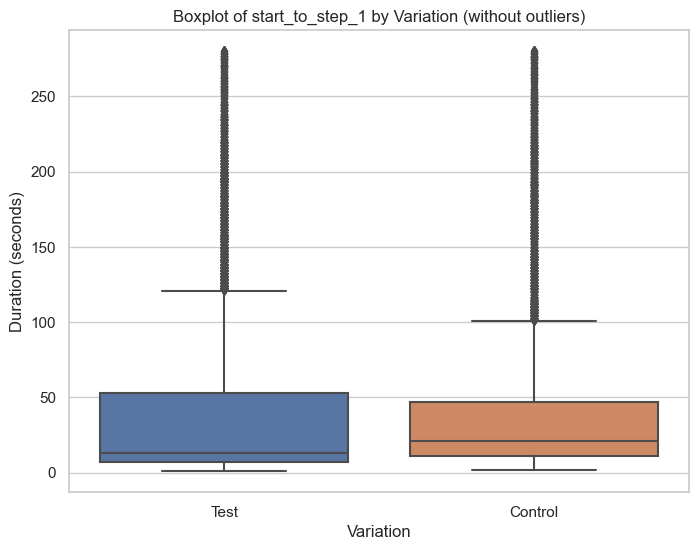

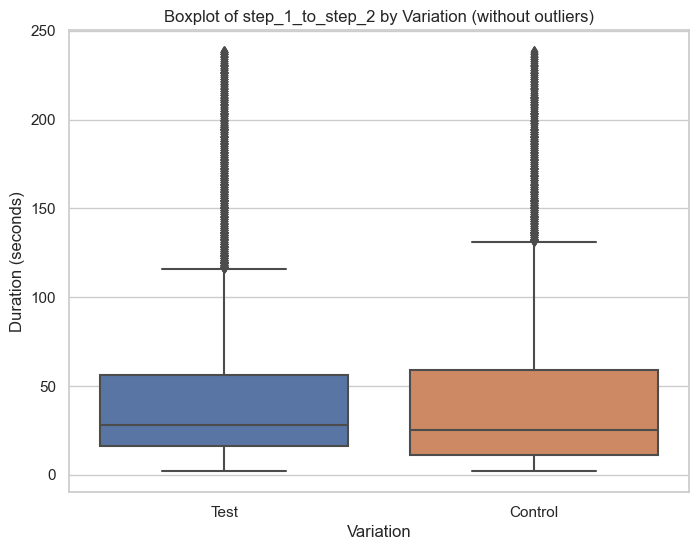

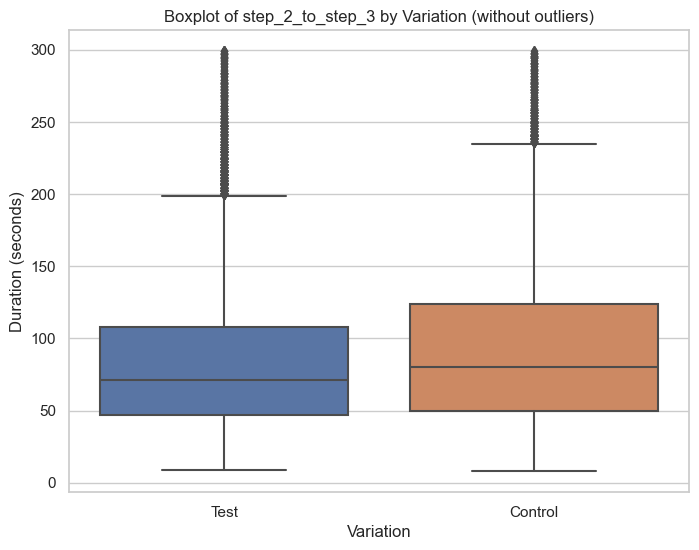

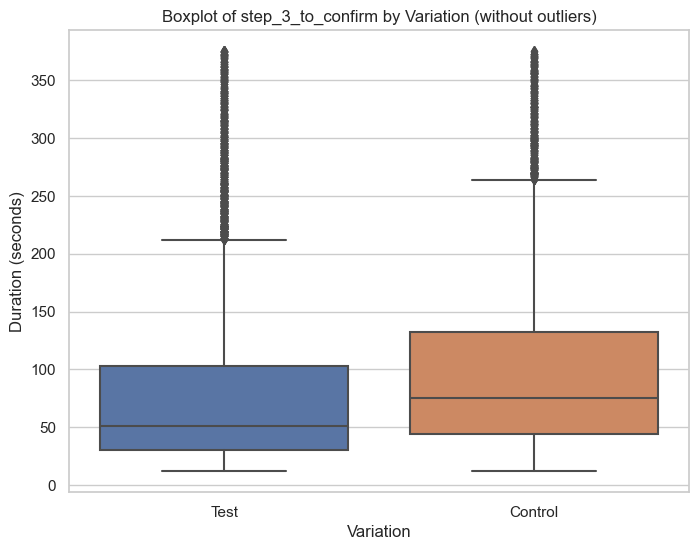

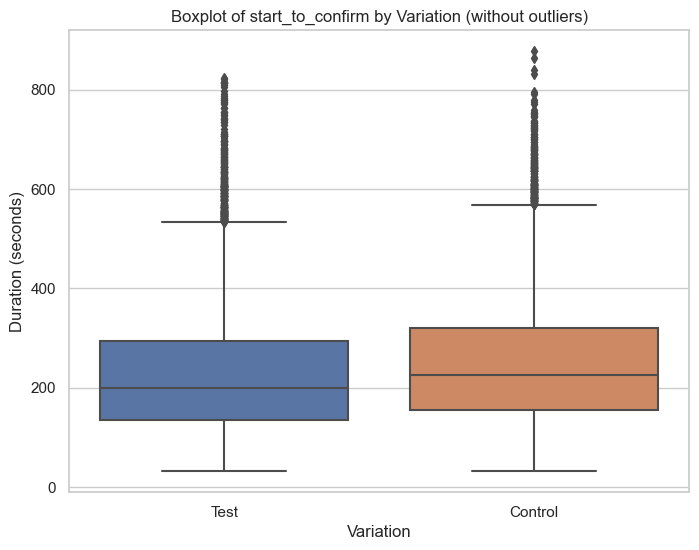

In [184]:
#----
# vis
#----
sns.set(style='whitegrid')

# boxplots
for duration in duration_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Variation', y=duration, data=analysis_data)
    plt.title(f'Boxplot of {duration} by Variation (without outliers)')
    plt.xlabel('Variation')
    plt.ylabel('Duration (seconds)')
    plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


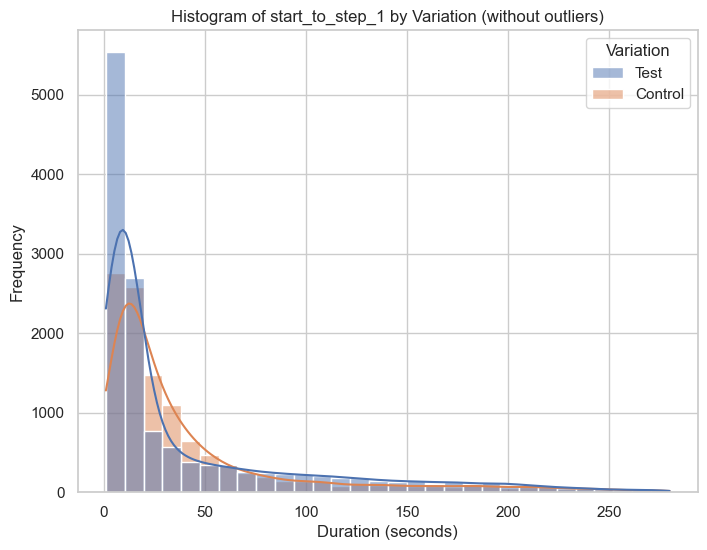

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


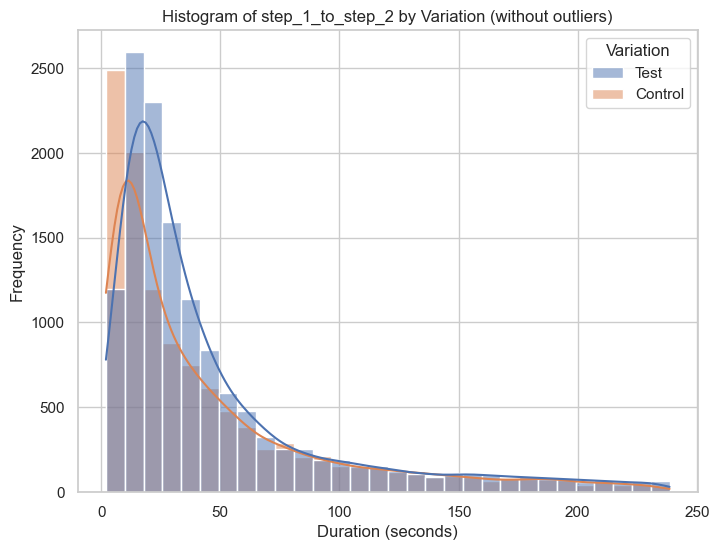

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


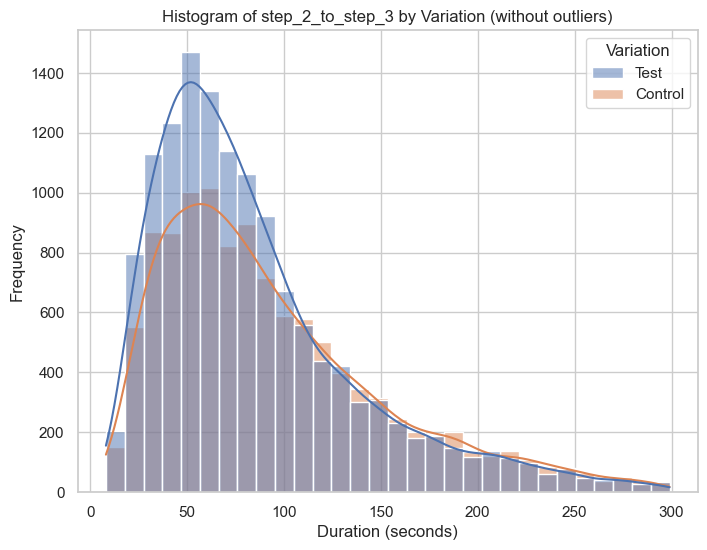

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


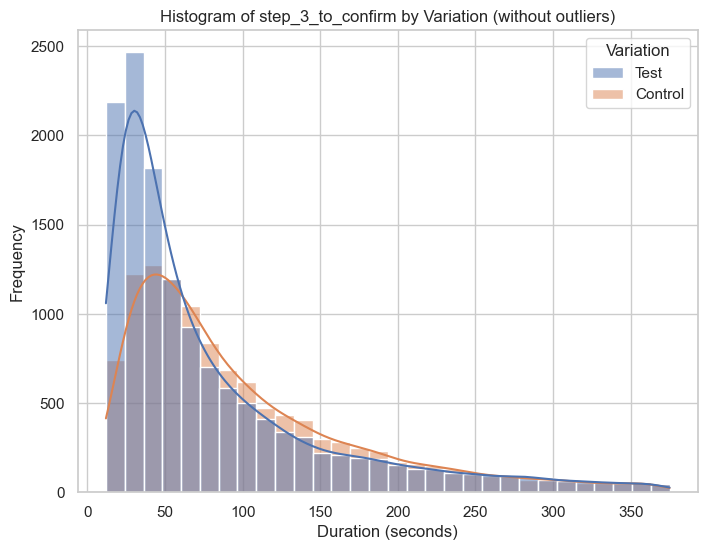

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


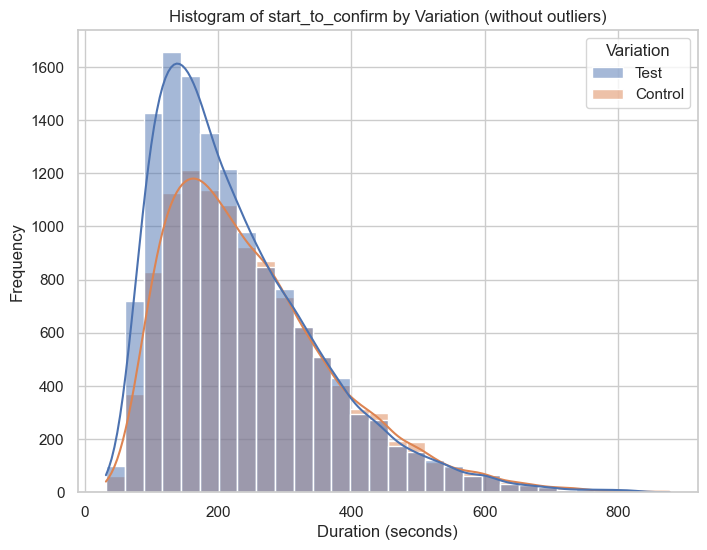

In [185]:
# histograms
for duration in duration_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=analysis_data, x=duration, hue='Variation', kde=True, bins=30)
    plt.title(f'Histogram of {duration} by Variation (without outliers)')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Frequency')
    plt.show()

In [186]:
cleaned_df.to_csv('cleaned_data_w_steps.csv')
df.to_csv('cleaned_data.csv')